In [1]:
from LTSpice_Simulator import get_Spice_Arrays
import Merge_Cartesian as MC
import Wavefront_Plotting as WP
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
input_values ={
    'L_time':'90',
    'C_time':'6',
    'L_impedance':'100',
}

interface = MC.Full_Cycle(**input_values)

LTSpice_outputs = get_Spice_Arrays(**input_values,Step_size=str(interface.data_input.GCD/8))


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        4500
Inductor Capacitance Per Length :       0.45
Inductor Length :                       1
Inductor Total Inductance :             4500
Inductor Total Capacitance :            0.45
Inductor Velocity :                     0.02222222222222222222222222222
Inductor One Way Time Delay :           45
Inductor Impedance :                    100

- The Capacitor -
Capacitor Inductance Per Length :       3
Capacitor Capacitance Per Length :      3
Capacitor Length :                      1
Capacitor Total Inductance :            3
Capacitor Total Capacitance :           3
Capacitor Velocity :                    0.3333333333333333333333333333
Capacitor One Way Time Delay :          3
Capacitor Impedance :                   1

- The Time -
Number Periods :                        1
Simulation Stop Time :                  730.0401616752981884909820438
Number of Wavefronts :                  30504
Number of

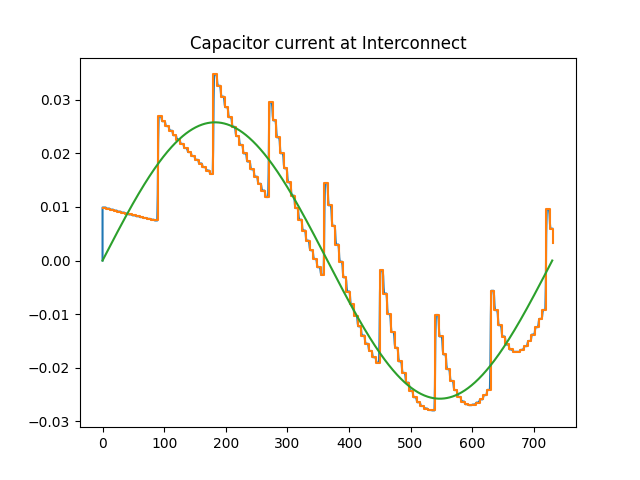

In [3]:
fig,ax = plt.subplots()

ax.plot(LTSpice_outputs['time'],LTSpice_outputs['Capacitor_Current_Tx'])
WP.plot_time_interconnect(interface.data_output_ordered,ax,'Current Capacitor',True)
ax.plot(LTSpice_outputs['time'],LTSpice_outputs['Capacitor_Current_Circuit'])

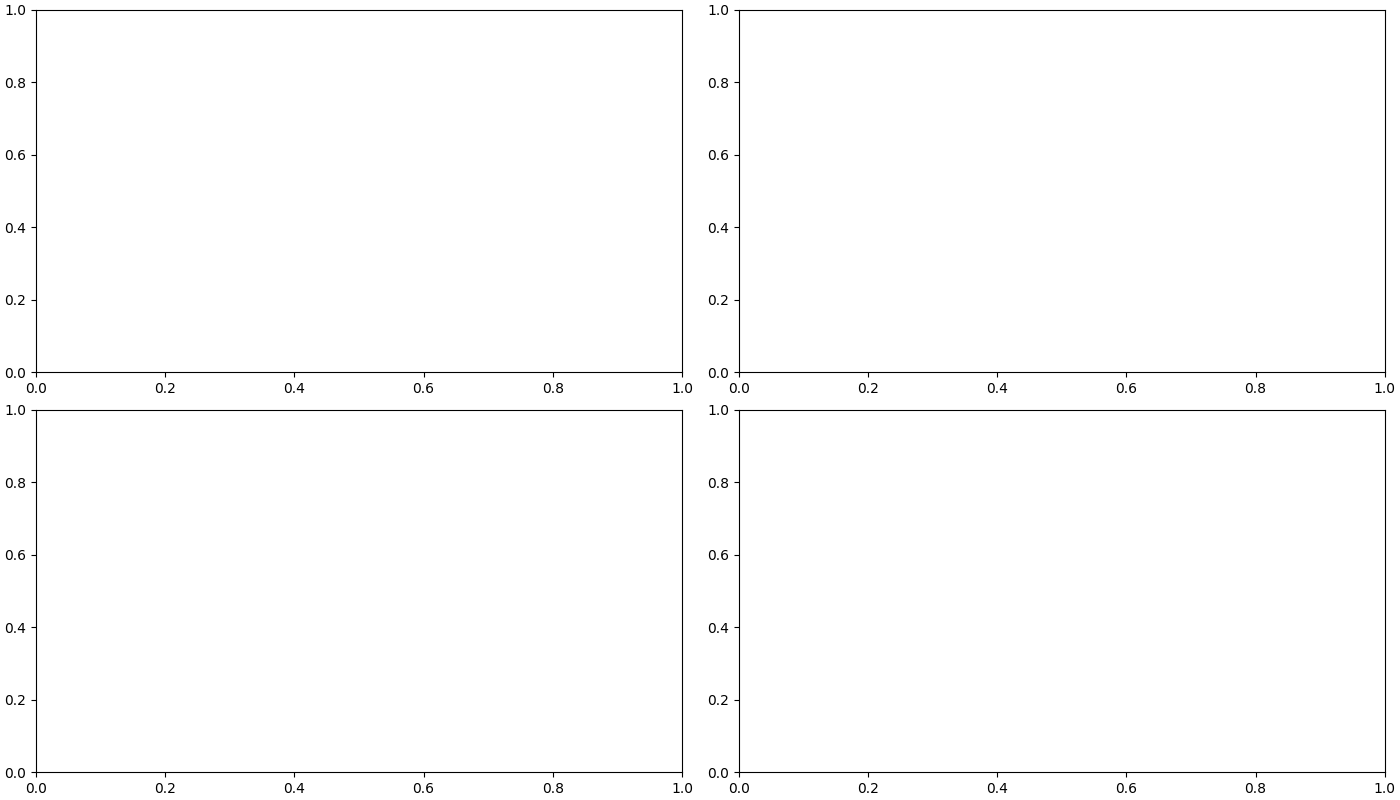

In [4]:
# WP.save_spatial_interconnect(interface)